In [1]:
#!jupyter nbconvert --to script 'MeanVar for logoptimal portfolio.ipynb'

In [2]:
# %load MeanVar\ for\ logoptimal\ portfolio.py


# In[2]:


import numpy as np
import pandas as pd
#import datetime
#import os
import matplotlib.pyplot as plt
#import seaborn.crayons

def tree_expansion(v, n):
    treexp=np.array([1])
    for i in range(n):
        tempm=np.matrix(treexp)
        treexp=np.concatenate(np.array(np.matrix(v).transpose()*tempm))
    return treexp

def MeanVar_for_bet(b_init, p_init, o_init, bet_length=1, bet_varies=False):
    p=tree_expansion(p_init, bet_length)
    o=tree_expansion(o_init, bet_length)
    if not bet_varies:
        b=tree_expansion(b_init, bet_length)
    else:
        b=b_init     
    exp_ret=p.dot(o*b)
    exp_ret2=p.dot((o*b)**2)
    var_ret=exp_ret2-exp_ret**2
    return exp_ret,var_ret

def sample_of_MeanVar_for_random_bet(p_init, o_init, sample_size, bet_length=1, bet_varies=False):
    p=tree_expansion(p_init, bet_length)
    o=tree_expansion(o_init, bet_length)
    b_init=np.random.uniform(size=(sample_size,len(p_init)))
    #b=np.array([bi/bi.sum() for bi in b_init])
    b=np.array([tree_expansion(bi/bi.sum(), bet_length) for bi in b_init])
    exp_ret=np.array([p.dot(o*bi) for bi in b])
    exp_ret2=np.array([p.dot((o*bi)**2) for bi in b])
    var_ret=exp_ret2-exp_ret**2
    return exp_ret,var_ret

def sample_of_MeanVar_for_random_bet2(p_init, o_init, sample_size, bet_length=1, bet_varies=False):
    p=tree_expansion(p_init, bet_length)
    o=tree_expansion(o_init, bet_length)
    b=np.random.uniform(size=(sample_size,len(p_init)))
    #b=np.array([bi/bi.sum() for bi in b_init])
    b=np.array([tree_expansion(bi/bi.sum(), bet_length) for bi in b_init])
    exp_ret=np.array([p.dot(o*bi) for bi in b])
    exp_ret2=np.array([p.dot((o*bi)**2) for bi in b])
    var_ret=exp_ret2-exp_ret**2
    return exp_ret,var_ret

#plt.scatter(var_ret, exp_ret)

def inv_0_ignored(v):
    return np.array([1/vi if vi != 0 else 0 for vi in v])

def rfree_opt_bet(o):
    prop=1/o
    return prop/prop.sum()

def mean_opt_bet(p,o):
    ### find the best possible mean, and then best possible variance
    prop=inv_0_ignored(np.vectorize(int)((o*p)==(o*p).max())*o)
    return prop/prop.sum()

def logmean_opt_bet(p):
    return p

def MeanVar_graph(p,o,sample_size=100, bet_length=1):
    main_data = sample_of_MeanVar_for_random_bet(p_init=p,o_init=o,sample_size=sample_size, bet_length=bet_length)
    logopt = MeanVar_for_bet(b_init=p,p_init=p,o_init=o, bet_length=bet_length)
    rfree = MeanVar_for_bet(b_init=rfree_opt_bet(o),p_init=p,o_init=o, bet_length=bet_length)
    opt = MeanVar_for_bet(b_init=mean_opt_bet(p,o),p_init=p,o_init=o, bet_length=bet_length)
    plt.scatter(main_data[1],main_data[0])
    plt.scatter(logopt[1],logopt[0])
    plt.scatter(rfree[1],rfree[0])
    plt.scatter(opt[1],opt[0])
    plt.xlabel('Var')
    plt.ylabel('Mean')
    plt.show()
    print('rfree bet, Mean '+'{:.2f}'.format(rfree[0])+', Var '+'{:.2f}'.format(rfree[1])+' (green)')
    print('log-mean-opt bet, Mean '+'{:.2f}'.format(logopt[0])+', Var '+'{:.2f}'.format(logopt[1])+' (orange)')
    print('mean-opt bet, Mean '+'{:.2f}'.format(opt[0])+', Var '+'{:.2f}'.format(opt[1])+' (red)')


In [3]:
%run MeanVar\ for\ logoptimal\ portfolio.py

# Mean-Var analysis of log-optimal portfolio
In the next text we introduce graphs that show how the log-optimal betting is located in the standard mean-variance coordinates. 
We have horses and we bet on them.
- vector $p$ denotes probabilities that particular horses win (the length of the vector $p$ is the number of horses in a race)
- vector $o$ denotes the odds
- vector $b$ describes how we split our money for bets, the members of the vector represents parts, so they sum up to one

Hence, if the $i$-th horse win, the payoff will be $o_ib_iC$, where $C$ are the money we used for the bets. 


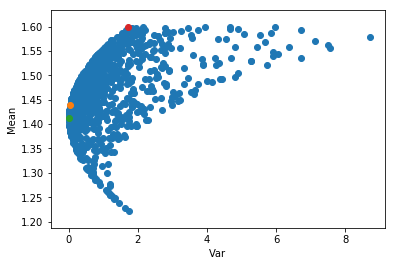

rfree bet, Mean 1.41, Var -0.00 (green)
log-mean-opt bet, Mean 1.44, Var 0.04 (orange)
mean-opt bet, Mean 1.60, Var 1.71 (red)


In [4]:
p=np.array([0.2,0.4,0.4])
o=np.array([8,4,3])
sample_size=10**len(p)
MeanVar_graph(p,o,sample_size)

In the figure above, 
- the green point represents the best risk-free bets,
- the orange point represents the log-optimal betting.
- the costs are normalized, i.e. C=1, for simplicity
- the blue points are randomly chosen bets and the corresponding pairs of Mean and Variance for such a strategy, 'sample_size' is related to them 



## Optimal Risk-free bet (min-optimal)
In the task to find the optimal risk-free bet, we are interested in the money we get for sure, so even in the worst scenario. This is $\min_i o_ib_i$. If we would like to optimize this amount over all possible bets, we find that the optimal bet $b$ is characterized by the condition that $o_ib_i$ is constant.

In particular, this optimal betting has zero variance. It is another chracteristics of it. For more details, see the text
"Michal Kupsa - Optimalization of risk-free revenue."

## Mean-optimal bet
The mean-optimal betting optimize the mean, i.e. the expected value, namely the expression

$$\sum_i o_ip_ib_i.$$

When we distribute our wealth over the possibilities, the part for which $p_io_i$ is maximal is enlarged the most. Hence, the best strategy is to put all the wealth on the option with the highest product $p_io_i$ over all $i$. When such an option $i$ is sole, we are done. 

In the previous case, the situation is exceptional. There are multiple mean-optimal betting strategies, because $p_1o_1=p_2o_2$. Hence, any bet $b$ that puts all the wealth on the first two options is mean-optimal. The python code then choose from them the one with the smallest variance. It is quite surprising that such a bet is unique and it is again characterized by the condition $o_ib_i$ is constant over all $i$ such that $p_io_i$ is maximal.

## Log-Mean-optimal bet
The log-mean-optimal betting optimize the mean of the logarithm of the payoff, i.e. the value

$$\sum_i p_i \log(o_i b_i).$$

It is explained elsewhere that the optimal bet $b$ is the one, that is proportional to the probabilities. Since $b$ is considered to be normalized, then $b$ simply equal $p$.

# Other Examples

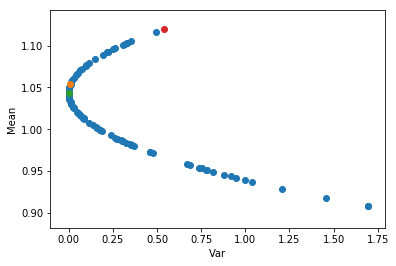

rfree bet, Mean 1.04, Var 0.00 (green)
log-mean-opt bet, Mean 1.05, Var 0.01 (orange)
mean-opt bet, Mean 1.12, Var 0.54 (red)


In [5]:
p=np.array([0.3,0.7])
o=np.array([3,1.6])
sample_size=10**len(p)
MeanVar_graph(p,o,sample_size)

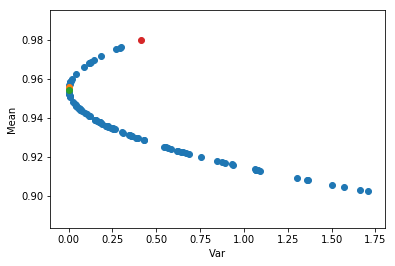

rfree bet, Mean 0.95, Var -0.00 (green)
log-mean-opt bet, Mean 0.96, Var 0.00 (orange)
mean-opt bet, Mean 0.98, Var 0.41 (red)


In [6]:
p=np.array([0.3,0.7])
o=np.array([3,1.4])
sample_size=10**len(p)
MeanVar_graph(p,o,sample_size)

# Sequential betting
Let us suppose that the race with the same horses will be repeated several times ('bet_length' in the code below). We suppose, that the probability for winning and the odds won't change. In each race we will use again all our wealth to bet. 
The question is again, how various optimal bets look like. It is not so difficult to see that mean-optimal bets for the sequence of races consists of mean-optimal bets for single race. The same is true for min-optimal and log-mean-optimal case.
Nevertheless, for the sequence of races the risk (measured by variance) increases for mean-optimal race very fast. The log-mean-optimal strategy has variance reasonable.

Compare the following two graphs.

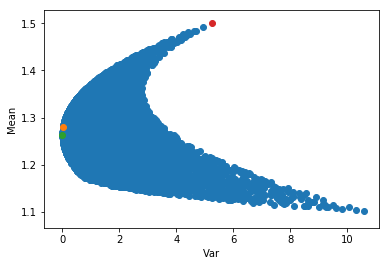

rfree bet, Mean 1.26, Var 0.00 (green)
log-mean-opt bet, Mean 1.28, Var 0.02 (orange)
mean-opt bet, Mean 1.50, Var 5.25 (red)


In [12]:
p=np.array([0.3,0.6, 0.1])
o=np.array([5,2,11])
sample_size=10**(len(p)+1)
bet_length=1
MeanVar_graph(p,o,sample_size,bet_length)

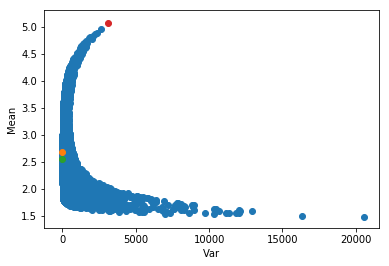

rfree bet, Mean 2.56, Var -0.00 (green)
log-mean-opt bet, Mean 2.68, Var 0.39 (orange)
mean-opt bet, Mean 5.06, Var 3138.43 (red)


In [13]:
p=np.array([0.3,0.6, 0.1])
o=np.array([5,2,11])
sample_size=10**(len(p)+1)
bet_length=4
MeanVar_graph(p,o,sample_size,bet_length)

# Playground
Below, try to vary the parameters. Have in mind that the computational time increases exponentially with 'bet_length'.  

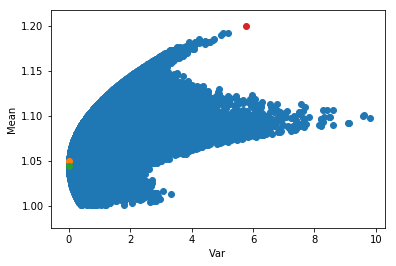

rfree bet, Mean 1.04, Var -0.00 (green)
log-mean-opt bet, Mean 1.05, Var 0.01 (orange)
mean-opt bet, Mean 1.20, Var 5.76 (red)


In [10]:
p=np.array([0.2,0.5, 0.1, 0.2])
o=np.array([5,2,11,6])
sample_size=max(10**(len(p)+1),1000)
bet_length=1
MeanVar_graph(p,o,sample_size,bet_length)

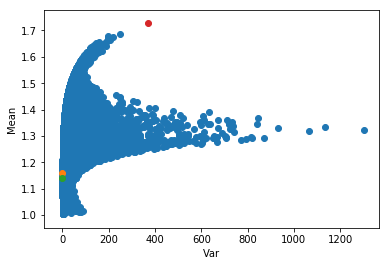

rfree bet, Mean 1.14, Var -0.00 (green)
log-mean-opt bet, Mean 1.16, Var 0.02 (orange)
mean-opt bet, Mean 1.73, Var 370.26 (red)


In [9]:
p=np.array([0.2,0.5, 0.1, 0.2])
o=np.array([5,2,11,6])
sample_size=max(10**(len(p)+1),1000)
bet_length=3
MeanVar_graph(p,o,sample_size,bet_length)